# Réseau de neurones à 2 couches
## Description

RDN à deux couches. La première ayant $n_1$ neurones et la deuxième dim(y) neurones.

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
def initialisation(n0, n1, n2):
    W1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    
    W2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)

    parametres = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}

    return parametres

In [3]:
def forward_propagation(X, parametres):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1 = W1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-Z1))
    Z2 = W2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-Z2))

    activation = {'A1': A1, 'A2': A2}
    
    return activation

In [4]:
def back_propagation(X, y, activation, parametres):
    A1 = activation['A1']
    A2 = activation['A2']
    W2 = parametres['W2']

    n = y.shape[1]
    
    dZ2 = A2 - y
    dW2 = 1/n * dZ2.dot(A1.T)
    db2 = 1/n * np.sum(dZ2, axis = 1, keepdims = True)
    
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1-A1)
    dW1 = 1/n * dZ1.dot(X.T)
    db1 = 1/n * np.sum(dZ1, axis = 1, keepdims = True)

    gradients = {'dW1': dW1, 'dW2': dW2, 'db1': db1, 'db2': db2}

    return gradients
    

In [5]:
def update(parametres, gradients, learning_rate):

    dW1 = gradients['dW1']
    dW2 = gradients['dW2']
    db1 = gradients['db1']
    db2 = gradients['db2']

    W1 = parametres['W1']
    W2 = parametres['W2']
    b1 = parametres['b1']
    b2 = parametres['b2']
    
    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parametres = {'W1': W1, 'W2': W2, 'b1': b1, 'b2': b2}
    
    return parametres

    

In [6]:
def predict(X, parametres):
    activations = forward_propagation(X, parametres)
    A2 = activations['A2']
    return A2 >= 0.5

In [7]:
def neural_network(X_train, y_train, n1, learning_rate = 0.1, n_iter = 100):
    n0 = X_train.shape[0]
    n2 = y_train.shape[0]
    
    parametres = initialisation(n0, n1, n2)
    
    train_loss = []
    train_acc = []

    for i in range(n_iter):
        activation = forward_propagation(X_train, parametres)
        gradients = back_propagation(X_train, y_train, activation, parametres)
        parametres = update(parametres, gradients, learning_rate)

        if i%10 == 0:
            train_loss.append(log_loss(y_train, activation['A2']))
            y_pred = predict(X_train, parametres)
            train_acc.append(accuracy_score(y_train.flatten(), y_pred.flatten()))

    plt.figure(figsize = (14, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label = 'train loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label = 'train acc')
    plt.legend()
    plt.show()

    return parametres

## Essai sur dataset

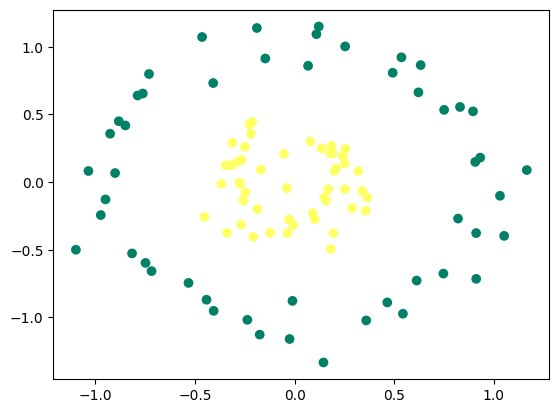

In [8]:
X, y = make_circles(n_samples = 100, noise = 0.1, factor = 0.3, random_state = 0)
X = X.T
y = y.reshape((1, y.shape[0]))

plt.scatter(X[0, :], X[1, :], c = y, cmap = 'summer')
plt.show()

C:\Users\jessi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jessi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jessi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jessi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\jessi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics

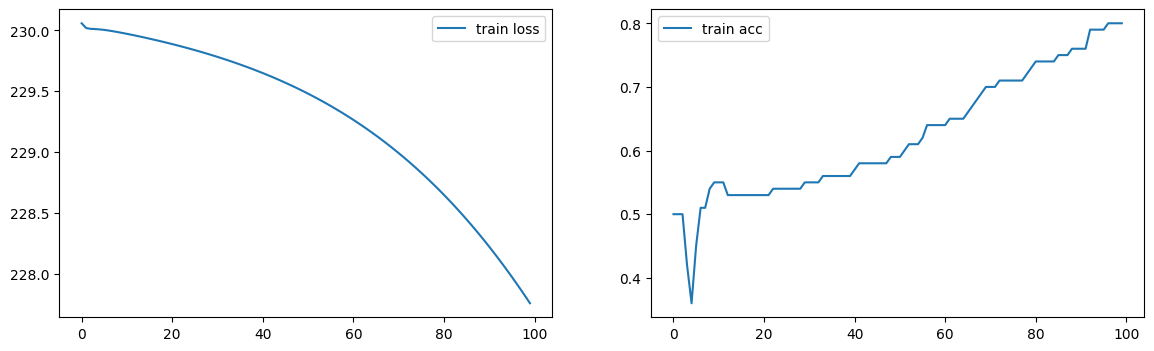

In [10]:
parametres = neural_network(X, y, n1 = 5, n_iter = 1000, learning_rate=0.1)